### Name : Raman Kumar

### LetsGrow More Virtual Internship Prpgram Task 1


###  Iris Flowers Classification ML Project :

#### Load Libraries 

In [1]:
#Load Important Libraries

import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

#### Set Working Directory 

In [2]:
os.chdir('C:\Internships & Projects\Lets Grow More Internship\Intermediate Level\Project 2')

#### Load The data 

In [3]:
data = pd.read_csv("Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#### Descriptive Statistics 

In [4]:
data.shape

(150, 6)

In [5]:
#drop the ID column

data = data.drop("Id", axis=1)

In [6]:
data.describe().style.background_gradient(cmap = 'copper')

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


#### Missing Value Analysis 

In [8]:
missing_val = data.isna().sum()
missing_val

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

No Missing Value

#### EDA

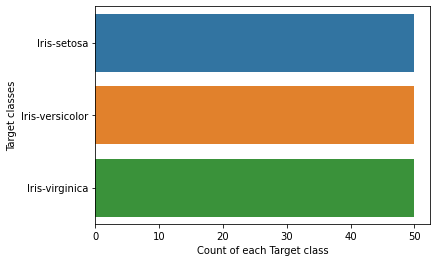

In [9]:
# target Class Count
sns.countplot(y=data.Species ,data=data)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

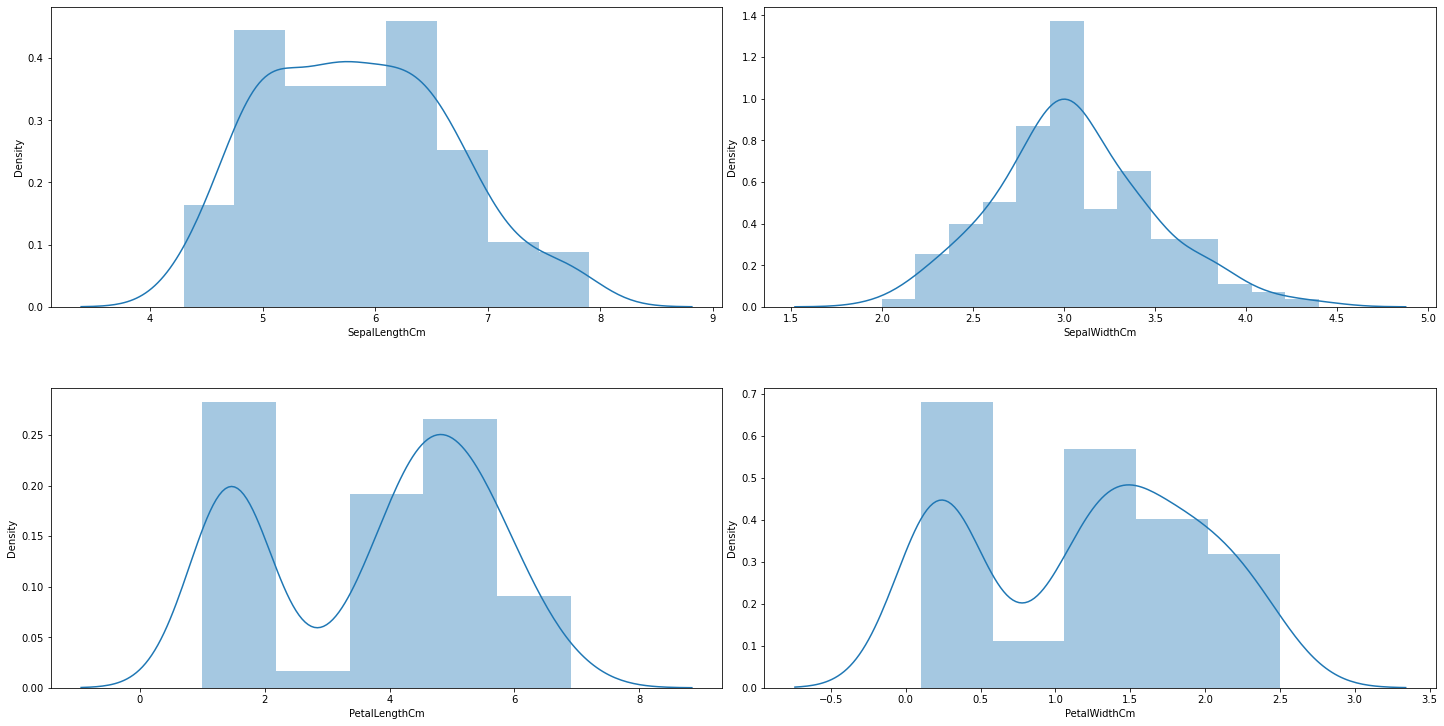

In [10]:
#Distribution of length & Width
df=data.drop(['Species'], axis=1)
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

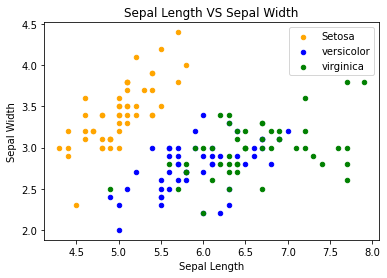

In [11]:
#Sepal Length VS Sepal Width
fig = data[data.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange', label='Setosa')
data[data.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='versicolor',ax=fig)
data[data.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Sepal Width")
plt.show()

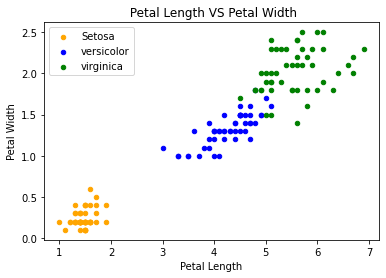

In [12]:
#Petal Length VS Petal Width
fig = data[data.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='orange', label='Setosa')
data[data.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='blue', label='versicolor',ax=fig)
data[data.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length VS Petal Width")
plt.show()

we can see that the Petal Features are giving a better cluster division compared to the Sepal features.  

#### Correlation Analysis 

In [13]:
data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


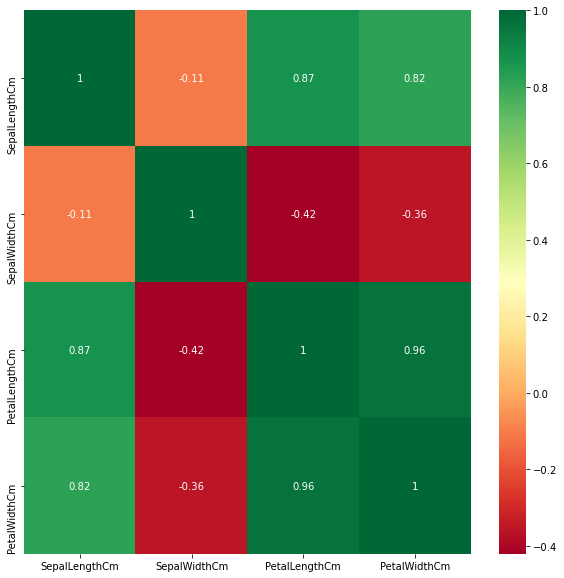

In [14]:
plt.figure(figsize=(10,10))
p=sns.heatmap(data.corr(), annot=True,cmap='RdYlGn') 

### Machine Learning 

#### Label Encoding the target class as ML deals only with Numerical features 

In [15]:
# Import label encoder
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
data['Species']= label_encoder.fit_transform(data['Species'])
 
data['Species'].unique()

array([0, 1, 2])

### Train Test Split 

In [16]:
# Dividing data into Train and Test
from sklearn.model_selection import train_test_split , cross_val_score
X = data.drop('Species', axis=1)
y = data['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

#### Scaling The Data 

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Logistic Regression 

In [18]:
from sklearn.linear_model import LogisticRegression

# selecting the classifier
log_reg= LogisticRegression()


log_reg.fit(X_train, y_train)

# checking model performance
y_pred= log_reg.predict(X_test)

### Model Evaluation 

[[18  0  0]
 [ 0 10  0]
 [ 0  1 16]]
0.9777777777777777
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.91      1.00      0.95        10
           2       1.00      0.94      0.97        17

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.97        45
weighted avg       0.98      0.98      0.98        45



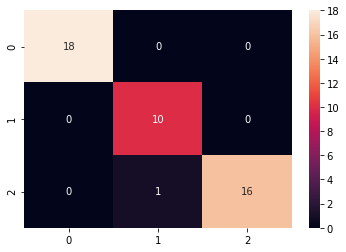

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

cm= confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

### RandomForestClassifier

In [20]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
# checking model performance
y_predicted = rfc.predict(X_test)

### Model Evaluation 

[[18  0  0]
 [ 0 10  0]
 [ 0  2 15]]
0.9555555555555556
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.83      1.00      0.91        10
           2       1.00      0.88      0.94        17

    accuracy                           0.96        45
   macro avg       0.94      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45



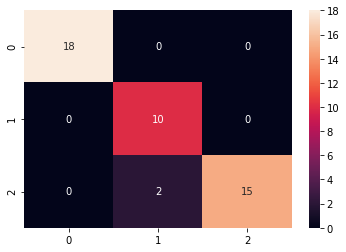

In [21]:
cm= confusion_matrix(y_test, y_predicted)
print(cm)
sns.heatmap(cm, annot=True)
print(accuracy_score(y_test, y_predicted))
print(classification_report(y_test, y_predicted))

### K – Nearest Neighbor (KNN) Classification 

In [22]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
# checking model performance
pred_y= classifier.predict(X_test)

### Model Evaluation 

[[18  0  0]
 [ 0  9  1]
 [ 0  2 15]]
0.9333333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.82      0.90      0.86        10
           2       0.94      0.88      0.91        17

    accuracy                           0.93        45
   macro avg       0.92      0.93      0.92        45
weighted avg       0.94      0.93      0.93        45



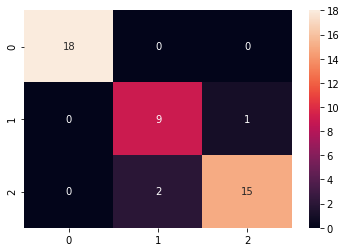

In [23]:
cm= confusion_matrix(y_test, pred_y)
print(cm)
sns.heatmap(cm, annot=True)
print(accuracy_score(y_test, pred_y))
print(classification_report(y_test, pred_y))

##### Thank You 